# Pseudo- Probability functions

Pseudo probability functions are mathematical functions that are used to represent the behavior of quantum systems. They provide a way to describe the quantum mechanical probability distribution in terms of classical probabilities.

----

There are several types of pseudo probability functions, including the Wigner function, the Husimi function, and the Glauber-Sudarshan P function. These functions are constructed from the wavefunction of the system, and provide a way to visualize the quantum mechanical probability distribution in phase space.

----

The Wigner function is a quasi-probability distribution that provides a way to represent the quantum mechanical density matrix in phase space. It is widely used to study the quantum-classical correspondence and to analyze the quantum dynamics of systems.

-----

The Husimi function is a smoothed version of the Wigner function that provides a more intuitive representation of the quantum mechanical probability distribution. It is commonly used in quantum optics to visualize the behavior of quantum states, including squeezed states and coherent states.

-----

The Glauber-Sudarshan P function is a positive representation of the quantum mechanical density matrix, and provides a way to visualize the quantum mechanical probability distribution in terms of classical probabilities.

In [1]:
%pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 36.2 MB/s eta 0:00:00


In [2]:
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from qutip import about, basis, dag, destroy, qfunc, wigner, wigner_cmap

%matplotlib inline

## Wigner function for superposition of fock states

The Wigner function is a quasi-probability distribution that provides a way to represent the quantum mechanical density matrix in phase space. In the context of a superposition of Fock states, the Wigner function provides a way to visualize the behavior of the system in phase space, including the interference between different Fock states.

----

A Fock state is a quantum state with a well-defined number of particles. A superposition of Fock states is a quantum state that is a linear combination of multiple Fock states, and represents the quantum mechanical behavior of a system with an uncertain number of particles.

----

The Wigner function of a superposition of Fock states is calculated by taking the Fourier transform of the density matrix of the system in the Fock basis. The resulting Wigner function provides a way to visualize the behavior of the superposition in phase space, including the distribution of particles and the interference between different Fock states.

In [3]:
x = 1.0 / np.sqrt(2) * (basis(10, 4) + basis(10, 2))
xvec = np.arange(-5, 5, 10.0 / 100)
yvec = xvec
W = wigner(x, xvec, yvec)
cmap = wigner_cmap(W)
X, Y = np.meshgrid(xvec, yvec)

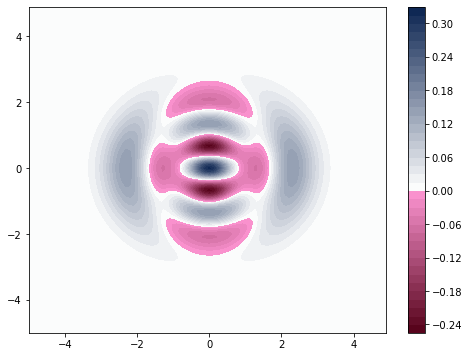

In [4]:
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, W, 50, cmap=cmap)
plt.colorbar();

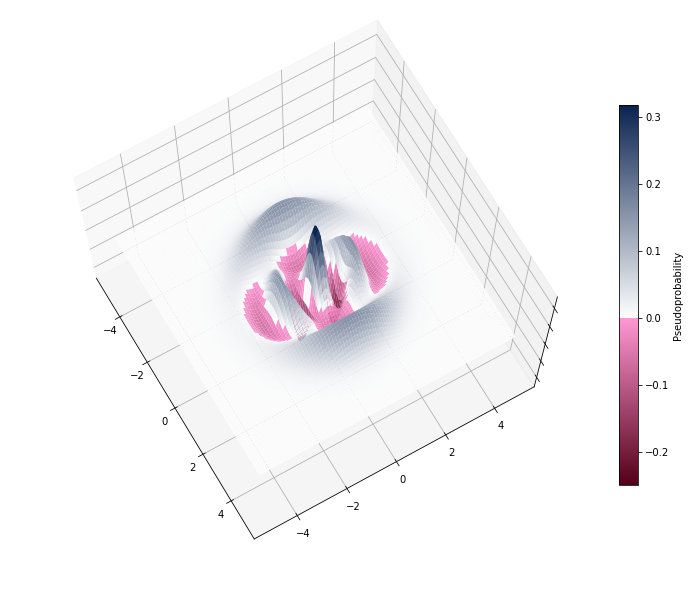

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, azim=-30, elev=73)
ax.plot_surface(X, Y, W, cmap=cmap, rstride=1, cstride=1, alpha=1, linewidth=0)
ax.set_zlim3d(-0.25, 0.25)
for a in ax.w_zaxis.get_ticklines() + ax.w_zaxis.get_ticklabels():
    a.set_visible(False)
nrm = mpl.colors.Normalize(W.min(), W.max())
cax, kw = mpl.colorbar.make_axes(ax, shrink=0.66, pad=0.02)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=nrm)
cb1.set_label("Pseudoprobability")

## Wigner and Q-function for squeezed states

The Wigner function and Q function are quasi-probability distributions that provide a way to visualize the behavior of quantum systems in phase space. In the context of squeezed states, they provide valuable insights into the behavior of the system, including the distribution of particles and the interference between different states.

----

A squeezed state is a quantum state with a reduced uncertainty in one of the quadratures of the field. Squeezed states have important applications in quantum optics, including quantum communication and quantum metrology.

----

The Wigner function of a squeezed state provides a way to visualize the distribution of particles in phase space, and to analyze the behavior of the system, including the interference between different states. The Wigner function of a squeezed state shows a squeezed distribution of particles, with the particles being more concentrated in one direction than in the other.

------

The Q function is a positive representation of the Wigner function, and provides a way to visualize the behavior of the system in terms of classical probabilities. The Q function of a squeezed state shows a similar distribution of particles as the Wigner function, with the particles being more concentrated in one direction than in the other.

In [6]:
N = 20
alpha = -1.0  # Coherent amplitude of field
epsilon = 0.5j  # Squeezing parameter
a = destroy(N)

D = (alpha * a.dag() - np.conj(alpha) * a).expm()  # Displacement
S = (
    0.5 * np.conj(epsilon) * a * a - 0.5 * epsilon * a.dag() * a.dag()
).expm()  # Squeezing
psi = D * S * basis(N, 0)  # Apply to vacuum state
g = 2

## Wigner function

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


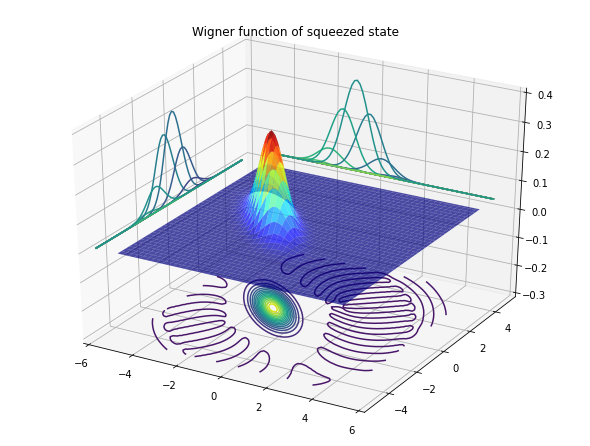

In [7]:
xvec = np.arange(-40.0, 40.0) * 5.0 / 40
X, Y = np.meshgrid(xvec, xvec)

W = wigner(psi, xvec, xvec)

fig1 = plt.figure(figsize=(8, 6))
ax = Axes3D(fig1)
ax.plot_surface(X, Y, W, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
ax.contour(X, Y, W, 15, zdir="x", offset=-6)
ax.contour(X, Y, W, 15, zdir="y", offset=6)
ax.contour(X, Y, W, 15, zdir="z", offset=-0.3)
ax.set_xlim3d(-6, 6)
ax.set_xlim3d(-6, 6)
ax.set_zlim3d(-0.3, 0.4)
plt.title("Wigner function of squeezed state");

## Q-function

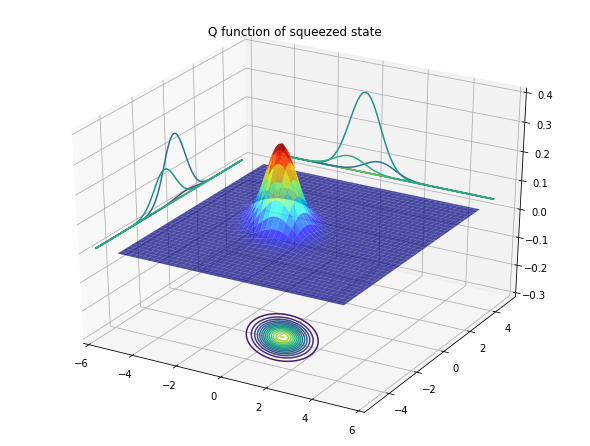

In [8]:
Q = qfunc(psi, xvec, xvec, g)

fig2 = plt.figure(figsize=(8, 6))
ax = Axes3D(fig2)
ax.plot_surface(X, Y, Q, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
ax.contour(X, Y, Q, zdir="x", offset=-6)
ax.contour(X, Y, Q, zdir="y", offset=6)
ax.contour(X, Y, Q, 15, zdir="z", offset=-0.4)
ax.set_xlim3d(-6, 6)
ax.set_xlim3d(-6, 6)
ax.set_zlim3d(-0.3, 0.4)
plt.title("Q function of squeezed state");

## Schrodinger cat state

In [9]:
N = 20
# amplitudes of coherent states
alpha1 = -2.0 - 2j
alpha2 = 2.0 + 2j
# define ladder oeprators
a = destroy(N)
# define displacement oeprators
D1 = (alpha1 * dag(a) - np.conj(alpha1) * a).expm()
D2 = (alpha2 * dag(a) - np.conj(alpha2) * a).expm()
# sum of coherent states
psi = np.sqrt(2) ** -1 * (D1 + D2) * basis(N, 0);  # Apply to vacuum state

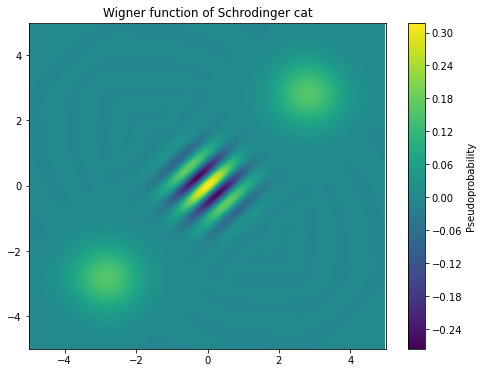

In [10]:
# calculate Wigner function
yvec = xvec = np.arange(-100.0, 100.0) * 5.0 / 100
g = 2.0
W = wigner(psi, xvec, yvec)
fig = plt.figure(figsize=(8, 6))
c = plt.contourf(xvec, yvec, np.real(W), 100)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.title("Wigner function of Schrodinger cat")
cbar = plt.colorbar(c)
cbar.ax.set_ylabel("Pseudoprobability");

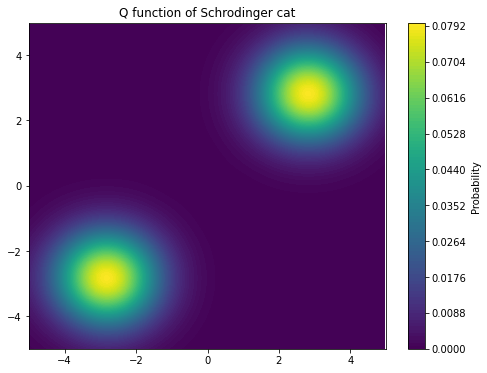

In [11]:
# calculate Q function
Q = qfunc(psi, xvec, yvec)
fig = plt.figure(figsize=(8, 6))
qplt = plt.contourf(xvec, yvec, np.real(Q), 100)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.title("Q function of Schrodinger cat")
cbar = plt.colorbar(qplt)
cbar.ax.set_ylabel("Probability");

## Software Version

In [12]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.1
Numpy Version:      1.21.6
Scipy Version:      1.7.3
Cython Version:     0.29.33
Matplotlib Version: 3.2.2
Python Version:     3.8.10
Number of CPUs:     2
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /usr/local/lib/python3.8/dist-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qut